## 2.1.- Medias Moviles
Las medias móviles son indicadores de análisis técnico que suavizan los precios de un activo a lo largo de un período de tiempo específico para identificar la dirección general de la tendencia. Hay varios tipos de medias móviles, pero las dos más comunes son la Media Móvil Simple $SMA$ y la Media Móvil Exponencial $EMA$.



### 2.1.1 Simple Moving Average - Media Móvil Simple - _(SMA)_

**Descipción:** 

La Media Móvil Simple $SMA$ es el promedio aritmético de los precios de cierre de un activo durante un período de tiempo específico. Se utiliza para suavizar los datos de precios y reducir el "ruido" para identificar la tendencia subyacente.

**Formula:**

La fórmula para la Media Móvil Simple $SMA$ es:

$$
\text{SMA} = \frac{P_1 + P_2 + \ldots + P_n}{n}
$$

Donde:
- $P_1$, $P_2$, ..., $P_n$ son los precios de cierre de los últimos n días.
- $n$ es el número de días del período.

**Algoritmo:**
1. Suma los precios de cierre de los últimos $n$ días.
2. Divide la suma entre $n$ para obtener la SMA.

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días:

| Día | Precio de Cierre $P_t$ |
|-----|------------------|
| 1   | 20               |
| 2   | 21               |
| 3   | 22               |
| 4   | 23               |
| 5   | 24               |

La $SMA$ de 5 días se calcula como:

$$
\text{SMA} = \frac{20 + 21 + 22 + 23 + 24}{5} = 22
$$





In [186]:
%pip install pandas_ta
%pip install setuptools
%pip install openpyxl



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: openpyxl in c:\users\macpro\appdata\local\programs\python\python310\lib\site-packages (3.1.4)




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import yfinance as yf
import datetime as dt
import pandas as pd
import plotly.graph_objects as go
import nbformat
import plotly.io as pio
import pandas_ta as ta
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import os 
import numpy as np 

In [188]:
# traemos los datos

# EJEMPLO CON YAHOO FINANZAS
ticker_symbol = 'BTC-USD'
ticker = yf.Ticker(ticker_symbol)

# Obtener el historial de precios
years=5
end_date= dt.datetime.now() # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los ultimos datos
start_date = end_date- dt.timedelta(365*years) # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los primeros datos
period='5d' # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval='1d' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# bajamos los datos
data = ticker.history(start=start_date, end=end_date, interval=interval)
# ticker_data=ticker.history(period=period, interval=interval)
# print(ticker_data)
# data.head()

In [189]:
periodo = 50
nombre_calculada = 'SMA_'+str(periodo)+'_calculada'
nombre_pd ='SMA_'+str(periodo)+'_pd'
nombre_pd_ta = 'SMA_'+str(periodo)+'_ta'
nombre_columna_precio = 'Close'

In [190]:
# cogemos los valores de los precios de cierre
close_prices = data[nombre_columna_precio].values

# creamso un array del tamaño de los precios de cierre con valores nan
sma_50_calculada = np.full_like(close_prices, np.nan)

# definimos el periodo de la media movil
periodo = 50

for i in range(close_prices.size):
    if i >= periodo-1:
        slice_data = close_prices[i - periodo + 1:i + 1] # el i+1 de la segunda parte de la expresion es porque si solo pusiera i, no incluye ese valor. hay que sumarle 1
        sma_50_calculada[i] = np.nanmean(slice_data)  # Calcula la media ignorando NaNs usando np.nanmean
    else:
        sma_50_calculada[i] = np.nan
        
data[nombre_calculada] = sma_50_calculada

In [191]:
# SMA Pandas
data[nombre_pd] = data[nombre_columna_precio].rolling(window=periodo).mean()

In [192]:
# SMA Pandas TA
data['SMA_50_ta'] = ta.sma(data[nombre_columna_precio], length=periodo)

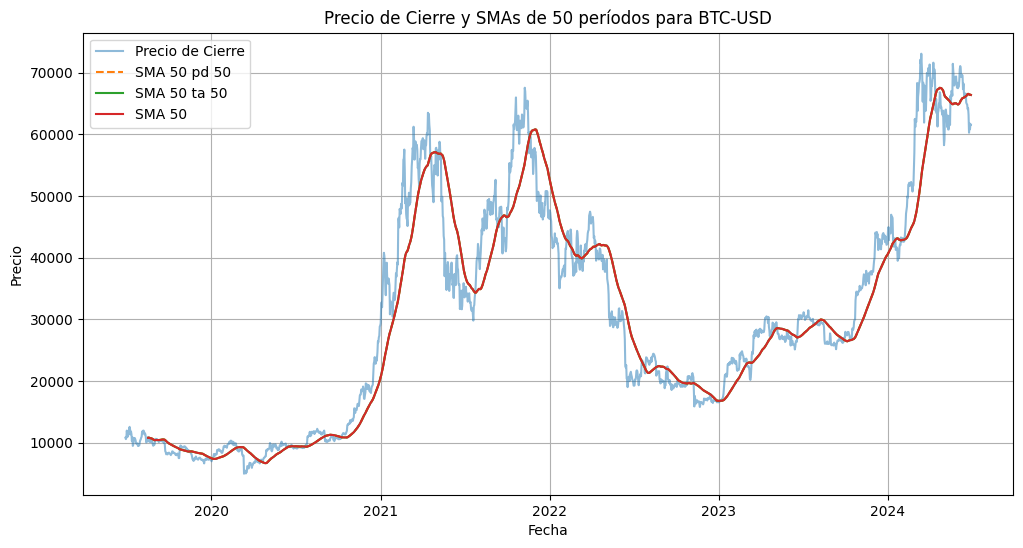

In [193]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[nombre_columna_precio], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data[nombre_pd], label='SMA 50 pd '+str(periodo), linestyle='--')
plt.plot(data.index, data[nombre_pd_ta], label='SMA 50 ta '+str(periodo))
plt.plot(data.index, data[nombre_calculada], label='SMA '+str(periodo))
plt.title(f'Precio de Cierre y SMAs de 50 períodos para {ticker_symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_columna_precio], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_pd_ta], 
                         mode='lines', name='SMA '+str(periodo), 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y SMA ({ticker_symbol})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True)

# Mostrar el gráfico interactivo
fig.show()

### 2.1.2 Exponential Moving Average - Media Móvil Exponencial - $EMA$

**Descripcion:**

La $EMA$ (Exponential Moving Average) es un tipo de media móvil que otorga más peso a los precios recientes, lo que la hace más sensible a los cambios recientes en el precio de un activo.

**Formula:**

La fórmula para calcular la $EMA$ en el período es:
$$
\text{EMA}_t = (P_t \times \alpha) + (\text{EMA}_{t-1} \times (1 - \alpha))
$$

donde:
$$
\alpha = \frac{smoothing factor}{n + 1}
$$

- $smoothing factor$ normalmente es igual a 2
- $P_t$ es el precio en el tiempo $t$.
- $EMA_t$ es el valor de la EMA en el tiempo $t$.
- $EMA_{t-1}$ es el valor de la EMA en el tiempo ${t-1}$
- $n$ es el número de períodos.

**Algoritmo:**

1. Calcular el valor inicial, es decir, la $EMA_1$. Está se define como la $SMA$ del periodo. Los valores anteriores serian $NaN$
2. Usar la fórmula de la $EMA$ para calcular los valores siguientes:

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días:

| Día | Precio de Cierre $P_t$ |
|-----|--------------------------|
| 1   | 20                       |
| 2   | 21                       |
| 3   | 22                       |
| 4   | 23                       |
| 5   | 24                       |

Primero, calculamos el factor de suavizamiento $\alpha$ para una EMA de 5 días:

$$
\alpha = \frac{2}{n + 1} = \frac{2}{5 + 1} = 0.333
$$

- Día 1: $EMA_{1}$ = $SMA$ 
- Día 2: $EMA_{2}$ = $(21 \times \alpha) + (EMA_{1} \times (1 - \alpha)) = 20.333$
- Día 3: $EMA_{3}$ = $(22 \times \alpha) + (EMA_{2} \times (1 - \alpha)) = 20.889$
- Día 4: $EMA_{4}$ = $(23 \times \alpha) + (EMA_{3} \times (1 - \alpha)) = 21.593$
- Día 5: $EMA_{5}$ = $(24 \times \alpha) + (EMA_{4} \times (1 - \alpha)) = 22.395$





In [218]:
periodo = 50
nombre_calculada = 'EMA_'+str(periodo)+'_calculada'
nombre_pd ='EMA_'+str(periodo)+'_pd'
nombre_pd_ta = 'EMA_'+str(periodo)+'_ta'

In [196]:
close_prices = data[nombre_columna_precio].values
smoothing = 2
alpha = smoothing/(periodo+1)
ema_calculada = np.full_like(close_prices, np.nan)

sma = np.mean(close_prices[:periodo])

ema_calculada[periodo-1] = sma

for i in range(periodo, len(close_prices)):    
    # Pt = close_prices[i]
    # ema_t_minus_1 = ema_calculada[i-1] 
    # ema_t = (close_prices[i]*alpha)+(ema_calculada[i-1]*(1-alpha))
    ema_calculada[i] = (close_prices[i]*alpha)+(ema_calculada[i-1]*(1-alpha))

data[nombre_calculada] = ema_calculada


In [197]:
# Calculando la EMA de 50 días con pandas 
data[nombre_pd] = data[nombre_columna_precio].ewm(span=periodo, adjust=False).mean()


In [198]:
# Calcular la EMA con pandas_ta
data[nombre_pd_ta] = ta.ema(data[nombre_columna_precio], length=periodo)


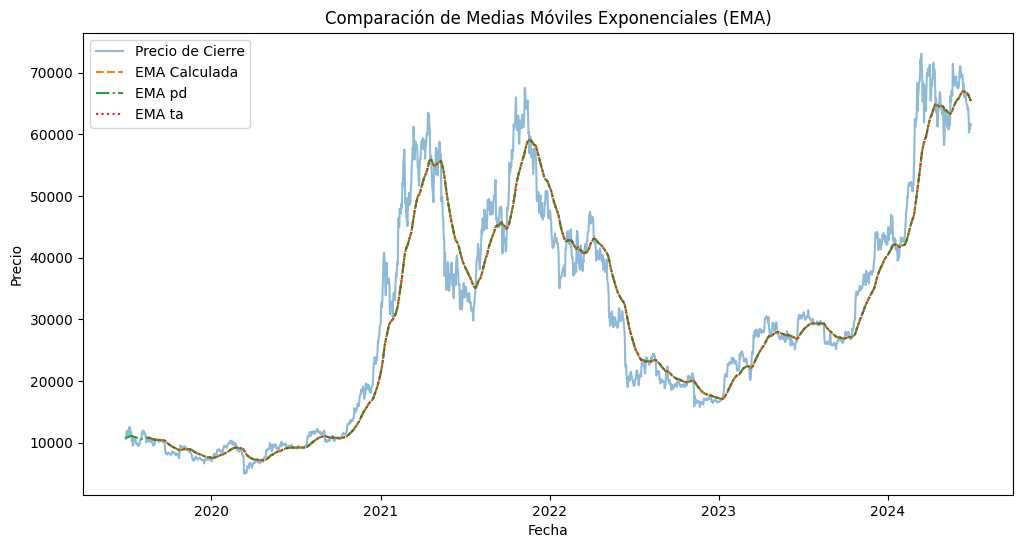

In [199]:
# Graficar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[nombre_columna_precio], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data[nombre_calculada], label='EMA Calculada ', linestyle='--')
plt.plot(data.index, data[nombre_pd], label='EMA pd', linestyle='-.')
plt.plot(data.index, data[nombre_pd_ta], label='EMA ta', linestyle=':')
plt.title('Comparación de Medias Móviles Exponenciales (EMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [211]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_columna_precio], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_pd_ta], 
                         mode='lines', name='EMA ' +str(periodo), 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y EMA ({ticker_symbol})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True)

# Mostrar el gráfico interactivo
fig.show()

### 2.1.3 Weighted Moving Average - Media Móvil Ponderada - $WMA$

**Descripcion:**

La $WMA$ (Weighted Moving Average) es un tipo de media móvil que asigna pesos diferentes a los precios según su posición temporal, dando más importancia a los precios más recientes.

**Formula:**

La fórmula para calcular la $WMA$ en el período $t$ es:
$$
\text{WMA}_t = \frac{\sum_{i=0}^{n-1} (P_{t} \times w_i)}{\sum_{i=0}^{n-1} w_i}
$$

donde:
- $P_{t}$ es el precio en el tiempo $t$.
- $w_i$ son los pesos asignados a cada precio.
- $n$ es el número de períodos.

**Algoritmo:**

1. Calcular los pesos $w_i$ para los últimos $n$ períodos.
2. Aplicar la fórmula de la $WMA$ para cada período.

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días y queremos calcular una WMA con ventana de 3 días:

| Día | Precio de Cierre $P_t$ |
|-----|--------------------------|
| 1   | 20                       |
| 2   | 21                       |
| 3   | 22                       |
| 4   | 23                       |
| 5   | 24                       |

Los pesos para una WMA de 3 días podrían ser, por ejemplo, [0.5, 0.3, 0.2].

- Día 3: \( WMA_{3} = \frac{(22 \times 0.5) + (21 \times 0.3) + (20 \times 0.2)}{0.5 + 0.3 + 0.2} = 21.5 \)
- Día 4: \( WMA_{4} = \frac{(23 \times 0.5) + (22 \times 0.3) + (21 \times 0.2)}{0.5 + 0.3 + 0.2} = 22.3 \)
- Día 5: \( WMA_{5} = \frac{(24 \times 0.5) + (23 \times 0.3) + (22 \times 0.2)}{0.5 + 0.3 + 0.2} = 23.1 \)

Este ejemplo ilustra cómo se calcula la WMA utilizando pesos específicos para cada período.


In [201]:
# variables
periodo = 50
pesos=np.array(range(1,periodo+1,1))
nombre_calculada = 'WMA_'+str(periodo)+'_calculada'
nombre_pd ='WMA_'+str(periodo)+'_pd'
nombre_pd_ta = 'WMA_'+str(periodo)+'_ta'

In [202]:
# manual    
wma = np.full_like(data[nombre_columna_precio],np.nan)
precios = data[nombre_columna_precio].values

for i in range(periodo, len(data[nombre_columna_precio])):
    # array_precios = precios[i-periodo:i]
    # resultado = np.multiply(array_precios,pesos)
    # suma_precios = np.sum(resultado)
    # wma[i] = suma_precios/pesos.sum()
    
    wma[i-1] = np.sum(np.multiply( precios[i-periodo:i],pesos))/pesos.sum()

data[nombre_calculada] = wma
wma

array([           nan,            nan,            nan, ...,
       66444.10926777, 66255.22886949,            nan])

In [203]:
# pandas
data[nombre_pd] = data[nombre_columna_precio].rolling(window=periodo).apply(lambda prices: np.dot(prices, pesos) / pesos.sum(), raw=True)


In [204]:
# pandas TA
data[nombre_pd_ta] = ta.wma(data[nombre_columna_precio], length=periodo)

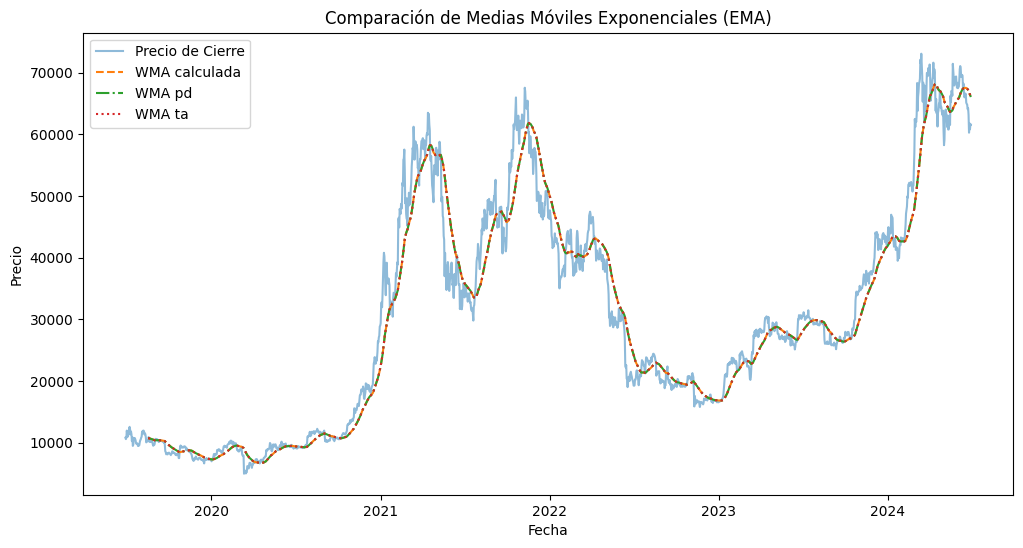

In [205]:
# Graficar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[nombre_columna_precio], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data[nombre_calculada], label='WMA calculada', linestyle='--')
plt.plot(data.index, data[nombre_pd], label='WMA pd', linestyle='-.')
plt.plot(data.index, data[nombre_pd_ta], label='WMA ta', linestyle=':')
plt.title('Comparación de Medias Móviles Exponenciales (EMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [210]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_columna_precio], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_pd_ta], 
                         mode='lines', name='WMA '+str(periodo), 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y WMA ({ticker_symbol})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True)
# Estilo oscuro

# Mostrar el gráfico interactivo
fig.show()

### Comparacion: SMA, EMA y WMA

In [217]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_columna_precio], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50_ta'], 
                         mode='lines', name='SMA '+str(periodo), 
                         line=dict(color='red', width=2)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data['EMA_50_ta'], 
                         mode='lines', name='EMA '+str(periodo), 
                         line=dict(color='yellow', width=2)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_pd_ta], 
                         mode='lines', name='WMA '+str(periodo), 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre - SMA, EMA, WMA ({ticker_symbol})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True)
# Mostrar el gráfico interactivo
fig.show()